In [1]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time

Using TensorFlow backend.


In [2]:
import os

base_dir = r'C:\Users\user\OneDrive - 台灣智園有限公司\文件\＊WG_New_2020_May\新-上開2020\交付物\交付物１：学习数据指标设计报告\6.20前给上开\课程一问卷\课程一 - training dataset'
train_dir = os.path.join(base_dir, 'training_dataset')

# Directory with our training unenthusiastic teaching pictures
train_unenthusiastic_dir = os.path.join(train_dir, 'unenthusiastic')

# Directory with our training enthusiastic teaching pictures
train_enthusiastic_dir = os.path.join(train_dir, 'enthusiastic')


In [3]:
train_unenthusiastic_fnames = os.listdir(train_unenthusiastic_dir)
train_unenthusiastic_fnames.sort()
print(train_unenthusiastic_fnames[:10])

train_enthusiastic_fnames = os.listdir(train_enthusiastic_dir)
print(train_enthusiastic_fnames[:10])

print('total training unenthusiastic images:', len(os.listdir(train_unenthusiastic_dir)))
print('total training enthusiastic images:', len(os.listdir(train_enthusiastic_dir)))


['unenthusiastic1.png', 'unenthusiastic10.png', 'unenthusiastic100.png', 'unenthusiastic101.png', 'unenthusiastic102.png', 'unenthusiastic103.png', 'unenthusiastic104.png', 'unenthusiastic105.png', 'unenthusiastic106.png', 'unenthusiastic107.png']
['enthusiastic1.png', 'enthusiastic10.png', 'enthusiastic100.png', 'enthusiastic101.png', 'enthusiastic102.png', 'enthusiastic103.png', 'enthusiastic104.png', 'enthusiastic105.png', 'enthusiastic106.png', 'enthusiastic107.png']
total training unenthusiastic images: 118
total training enthusiastic images: 134


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

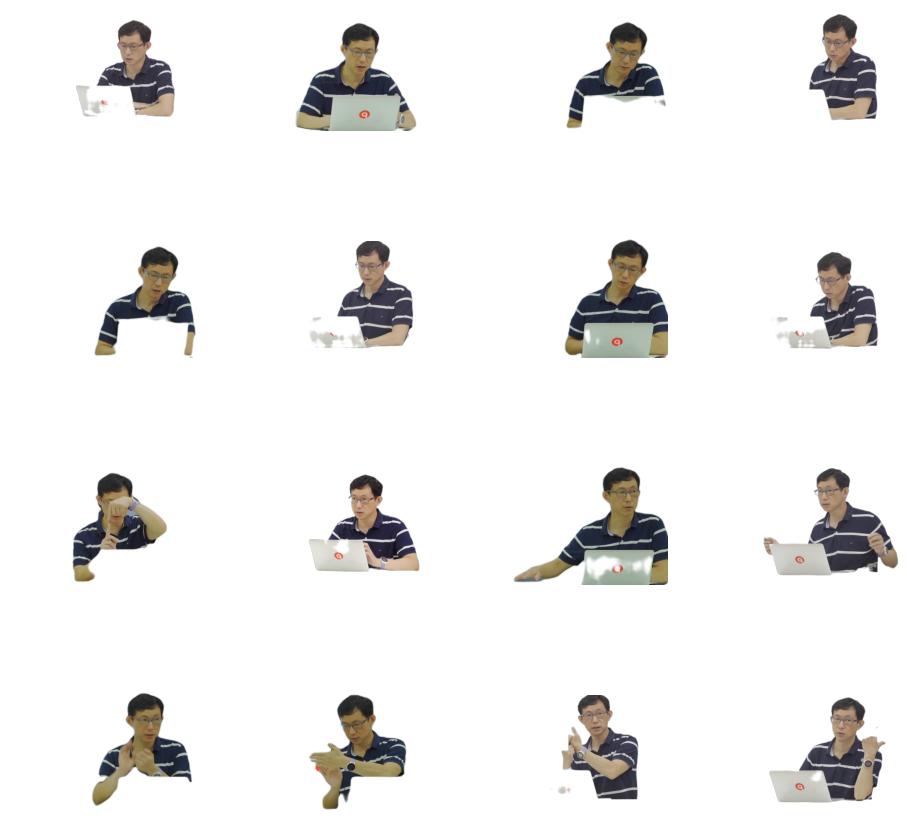

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_unenthusiastic_pix = [os.path.join(train_unenthusiastic_dir, fname) 
                for fname in train_unenthusiastic_fnames[pic_index-8:pic_index]]
next_enthusiastic_pix = [os.path.join(train_enthusiastic_dir, fname) 
                for fname in train_enthusiastic_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_unenthusiastic_pix+next_enthusiastic_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Our input feature map is 333X333x3: 333X333 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(333, 333, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)


In [7]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 333, 333, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 331, 331, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 165, 165, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 163, 163, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 81, 81, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 79, 79, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 39, 39, 64)        0     

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(333, 333),  # All images will be resized to 333X333
        classes= ['unenthusiastic', 'enthusiastic'],    #defult: 0为前者, 1会后者
        batch_size=18,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 252 images belonging to 2 classes.


In [11]:
train_labels = train_generator.classes 
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=14,  # 252 images = batch_size * steps
      epochs=4,
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 14 steps
Epoch 1/4
14/14 - 61s - loss: 2.1528 - acc: 0.5833
Epoch 2/4
14/14 - 60s - loss: 0.5300 - acc: 0.7579
Epoch 3/4
14/14 - 59s - loss: 0.3717 - acc: 0.8492
Epoch 4/4
14/14 - 64s - loss: 0.2561 - acc: 0.8810


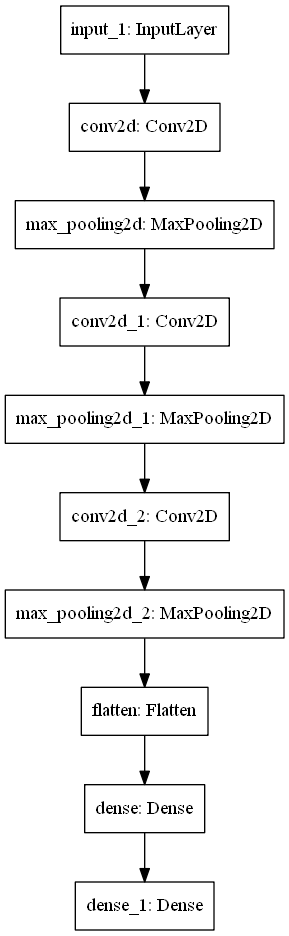

In [13]:
from tensorflow.keras.utils import plot_model
import pydot_ng as pydot

plot_model(model, to_file='model.png')

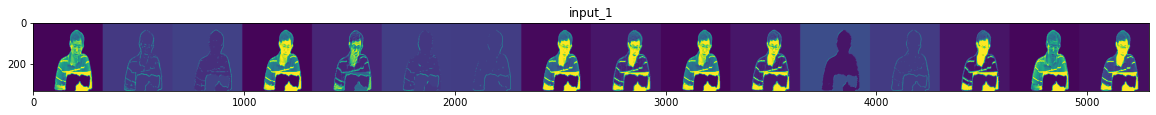

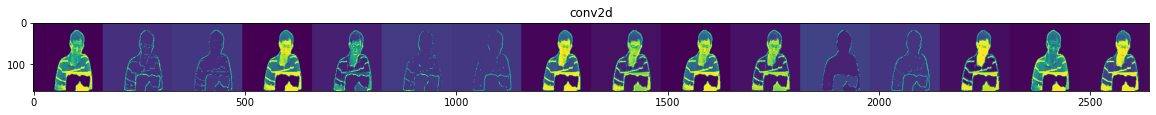

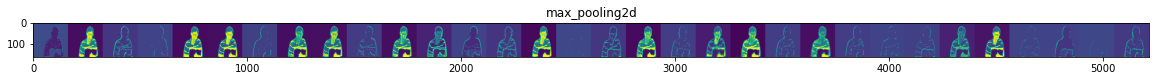

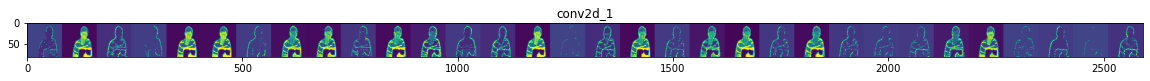

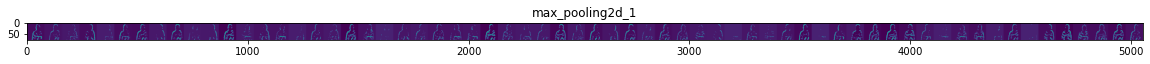

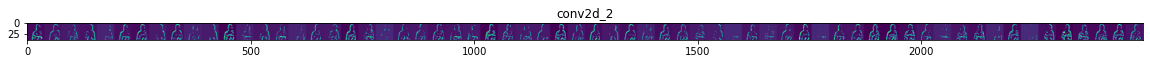

In [14]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a unenthusiastic or ununenthusiastic from the training set.
unenthusiastic_img_files = [os.path.join(train_unenthusiastic_dir, f) for f in train_unenthusiastic_fnames]
enthusiastic_img_files = [os.path.join(train_enthusiastic_dir, f) for f in train_enthusiastic_fnames]
img_path = random.choice(unenthusiastic_img_files + unenthusiastic_img_files)

img = load_img(img_path, target_size=(333, 333))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (333, 333, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 333, 333, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training loss')

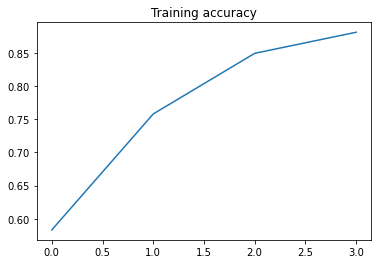

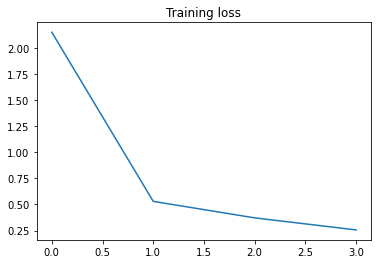

In [15]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.title('Training accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.title('Training loss')

In [50]:
import os

test_generator.reset()

test_dir = os.path.join(base_dir, 'test_dataset')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(333, 333),
        batch_size=18,
        class_mode='binary',
        shuffle=False)    #it is important to specify shuffle=False in order to preserve 
                            #the order of filenames and predictions.

pred=model.predict_generator(test_generator, steps=len(test_generator), verbose=1)


# Get classes by np.round
cl = np.round(pred)
# Get filenames (set shuffle=false in generator is important)
filenames=test_generator.filenames

# Data frame
results=pd.DataFrame({"file":filenames,"pr":pred[:,0], "class":cl[:,0]})



Found 252 images belonging to 1 classes.
14/14 [==============================] - 57s 4s/step


In [55]:
pd.set_option('display.max_columns', 22)
pd.set_option('display.max_rows', 252)

results

,file,pr,class
0,Test\C1_test (1).png,0.984705,1.0
1,Test\C1_test (10).png,0.995730,1.0
2,Test\C1_test (100).png,0.987847,1.0
3,Test\C1_test (101).png,0.997840,1.0
4,Test\C1_test (102).png,0.989605,1.0
5,Test\C1_test (103).png,0.994753,1.0
6,Test\C1_test (104).png,0.995324,1.0
7,Test\C1_test (105).png,0.998423,1.0
8,Test\C1_test (106).png,0.997698,1.0
9,Test\C1_test (107).png,0.997758,1.0


In [53]:
len(results.loc[results['class'] == 1.0])

148

In [54]:
len(results.loc[results['class'] == 0])

104

In [16]:
import numpy as np
import skimage

unen_img = []
for i in range(118):
    img_path = os.path.join(train_unenthusiastic_dir, 'unenthusiastic'+str( (i+1))+'.png')
    img = load_img(img_path, target_size=(333, 333))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255
    unen_img.append(x)

len(unen_img)

118

In [17]:
prob_of_en_on_unenIMG = []
for i in range(118):
    a = model.predict(unen_img[i])
    a = a.flatten()
    a = a.tolist()
    prob_of_en_on_unenIMG.append(a)

prob_of_en_on_unenIMG
#You have predicted class probabilities. Since you are doing binary classification. 
#You have a dense layer consisting of one unit with an activation function of the sigmoid. 
#Sigmoid function outputs a value in the range [0,1] which corresponds to 
# the probability of the given sample belonging to a positive class (i.e. class one).

#通过train_labels = train_generator.classes 查询, 
#我们知道"enthusiastic"是1 (positive class), "unenthusiastic"是0 (negative class). 

[[0.7194811105728149],
 [0.045223310589790344],
 [0.10813309252262115],
 [0.0196826234459877],
 [0.024467410519719124],
 [0.15748432278633118],
 [0.45816749334335327],
 [0.054053038358688354],
 [0.029697252437472343],
 [0.031455520540475845],
 [0.38957053422927856],
 [0.7354314923286438],
 [0.7176588177680969],
 [0.0815524160861969],
 [0.21027104556560516],
 [0.02957237884402275],
 [0.020987993106245995],
 [0.24077212810516357],
 [0.08822085708379745],
 [0.1262216717004776],
 [0.04693925753235817],
 [0.054936278611421585],
 [0.14730504155158997],
 [0.11721371859312057],
 [0.09287169575691223],
 [0.45706963539123535],
 [0.04760336875915527],
 [0.7663319110870361],
 [0.37165260314941406],
 [0.7478318810462952],
 [0.05699240416288376],
 [0.1674364060163498],
 [0.6869937777519226],
 [0.10637753456830978],
 [0.19174692034721375],
 [0.25636225938796997],
 [0.19557765126228333],
 [0.3355660140514374],
 [0.3831690847873688],
 [0.13076724112033844],
 [0.26386263966560364],
 [0.06958180665969849

In [18]:
en_img = []
for i in range(134):
    img_path = os.path.join(train_enthusiastic_dir, 'enthusiastic'+str( (i+1))+'.png')
    img = load_img(img_path, target_size=(333, 333))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255
    en_img.append(x)

len(en_img)

134

In [19]:
prob_of_en_on_enIMG = []
for i in range(134):
    b = model.predict(en_img[i])
    b = b.flatten()
    b = b.tolist()
    prob_of_en_on_enIMG.append(b)

prob_of_en_on_enIMG

[[0.9847046136856079],
 [0.9403780102729797],
 [0.9686205983161926],
 [0.9391840696334839],
 [0.9902079701423645],
 [0.9934771656990051],
 [0.9968482851982117],
 [0.997744083404541],
 [0.9971742630004883],
 [0.9957301020622253],
 [0.5854730606079102],
 [0.9989469647407532],
 [0.7752468585968018],
 [0.996439516544342],
 [0.9961238503456116],
 [0.9994542002677917],
 [0.7701631188392639],
 [0.9998514652252197],
 [0.9983391761779785],
 [0.9989475607872009],
 [0.8841785788536072],
 [0.9918539524078369],
 [0.9905042052268982],
 [0.9168789386749268],
 [0.9902894496917725],
 [0.9992212057113647],
 [0.7423531413078308],
 [0.9985771179199219],
 [0.6740750670433044],
 [0.8232588171958923],
 [0.9984102249145508],
 [0.9997439980506897],
 [0.9976544976234436],
 [0.9846509695053101],
 [0.7533804178237915],
 [0.9996324777603149],
 [0.9878634214401245],
 [0.9806230068206787],
 [0.9964190721511841],
 [0.9847298264503479],
 [0.9842731952667236],
 [0.9982922673225403],
 [0.9982208609580994],
 [0.999396204

In [20]:
unen_img_squeeze = []

for i in range(118):
    c = np.squeeze(unen_img[i], axis=0)
    unen_img_squeeze.append(c)

In [21]:
en_img_squeeze = []

for i in range(134):
    d = np.squeeze(en_img[i], axis=0)
    en_img_squeeze.append(d)

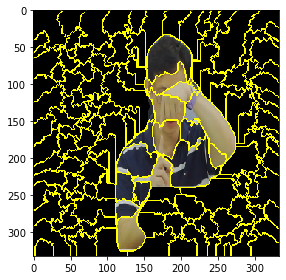

In [22]:
#Generate segmentation for image
import skimage.segmentation
import skimage.io
superpixels = skimage.segmentation.quickshift(en_img_squeeze[0], kernel_size=4, max_dist=200, ratio=0.5)
num_superpixels = np.unique(superpixels).shape[0]
skimage.io.imshow(skimage.segmentation.mark_boundaries(en_img_squeeze[0], superpixels))


In [23]:
num_superpixels

132

In [24]:
#Generate perturbations
num_perturb = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations.shape

(150, 132)

[0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1
 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1
 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0]


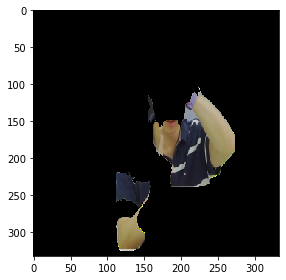

In [25]:
#Create function to apply perturbations to images
import copy
def perturb_image(img,perturbation,segments): 
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]
  return perturbed_image

#Show example of perturbations
print(perturbations[0]) 
skimage.io.imshow(perturb_image(en_img_squeeze[0],perturbations[0],superpixels))

In [26]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(en_img_squeeze[0],pert,superpixels)
  pred = model.predict(perturbed_img[np.newaxis,:,:,:])
  predictions.append(pred)

predictions = np.array(predictions)
print(predictions.shape)

(150, 1, 1)


In [27]:
#Compute distances to original image
import sklearn.metrics
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
print(distances.shape)

#Transform distances to a value between 0 an 1 (weights) using a kernel function
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
print(weights.shape)

(150,)
(150,)


In [28]:
predictions_sq = np.squeeze(predictions, axis=1)

In [29]:
predictions_sq = np.squeeze(predictions_sq, axis=1)

In [30]:
#Estimate linear model
from sklearn.linear_model import LinearRegression
simpler_model = LinearRegression().fit(X=perturbations, y=predictions_sq, sample_weight=weights)
coeff = simpler_model.coef_

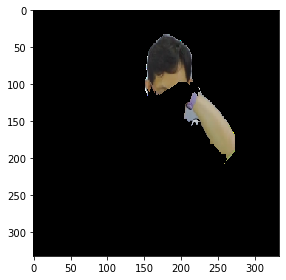

In [31]:
#Use coefficients from linear model to extract top features
num_top_features = 5
top_features = np.argsort(coeff)[-5:] #10 = num_top_features

#Show only the superpixels corresponding to the top features
mask = np.zeros(num_superpixels) 
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(en_img_squeeze[0],mask,superpixels))

In [32]:
def perturb_image2(mask, segments): 
  active_pixels = top_features
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  return mask

C = perturb_image2(mask, superpixels)
D = np.int64(C)
D

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

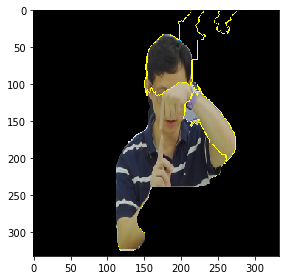

In [33]:
skimage.io.imshow(skimage.segmentation.mark_boundaries(en_img_squeeze[0], D))

In [34]:
from lime import lime_image
import time

In [35]:
explainer = lime_image.LimeImageExplainer()

In [36]:
explanation = explainer.explain_instance(en_img_squeeze[0], model, hide_color=0)

In [37]:
tmp = time.time()
print(time.time() - tmp)

0.0


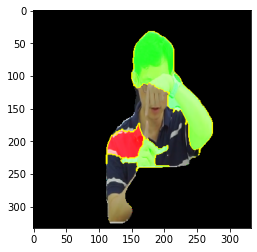

In [38]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

In [39]:
en_img_squeeze[0].shape #直接餵給inceptionV3_model.predict需要(batch_size, 299, 299, 3) = Xi[np.newaxis,:,:,:]
                        #餵給explainer.explain_instance只需(299, 299, 3) = Xi (非0-1 or 0-255)

(333, 333, 3)

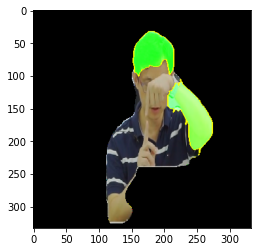

In [40]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=2, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

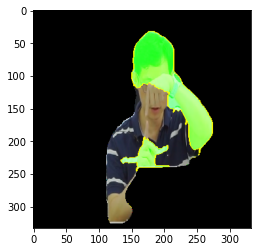

In [41]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

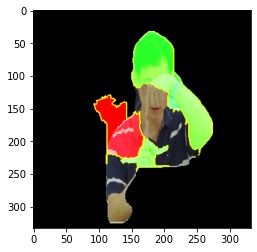

In [42]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=6, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

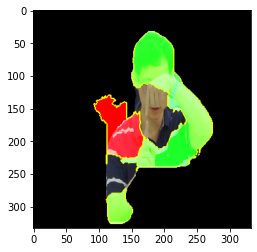

In [43]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=8, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

In [82]:
prob_of_en_on_enIMG_F = [val for sublist in prob_of_en_on_enIMG for val in sublist]

top_50_idx = np.argsort(prob_of_en_on_enIMG_F)[-50:]
top_50_values = [prob_of_en_on_enIMG_F[i] for i in top_50_idx]

print(top_50_idx)
print(top_50_values)


[103  94  91   9 113  14 112  38  13 133   6  58  55   8 121  92 120  98
  60  32 105   7 106 100  95  49  74  42  82  41  18  30 104  27  47  11
  19  73 108  25  63  57  43  15  46 118 116  35  31  17]
[0.9953243136405945, 0.995524525642395, 0.995557963848114, 0.9957301020622253, 0.9958595633506775, 0.9961238503456116, 0.9961291551589966, 0.9964190721511841, 0.996439516544342, 0.9967748522758484, 0.9968482851982117, 0.9970796704292297, 0.9971604347229004, 0.9971742630004883, 0.9972667694091797, 0.9972898960113525, 0.9973236322402954, 0.9974461793899536, 0.9975839853286743, 0.9976544976234436, 0.9976983666419983, 0.997744083404541, 0.9977578520774841, 0.9978395700454712, 0.9979209303855896, 0.9980602860450745, 0.9981436729431152, 0.9982208609580994, 0.9982808828353882, 0.9982922673225403, 0.9983391761779785, 0.9984102249145508, 0.9984228610992432, 0.9985771179199219, 0.9988523721694946, 0.9989469647407532, 0.9989475607872009, 0.9990583062171936, 0.9991163611412048, 0.9992212057113647,

In [83]:
a_dictionary = {}

for i in top_50_idx:
    a_dictionary['explanation%s' %i] = explainer.explain_instance(en_img_squeeze[i], model, hide_color=0)


In [85]:
from skimage.segmentation import mark_boundaries
dic_temp = {}
dic_mask = {}

for i in top_50_idx: 
    temp['temp%s' %i], mask['mask%s' %i] = a_dictionary['explanation' + str(i)].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

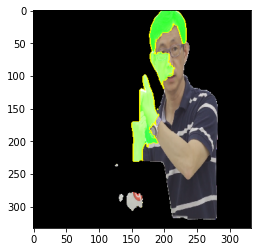

In [137]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation103'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

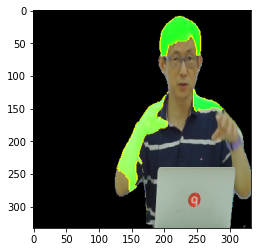

In [140]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation94'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

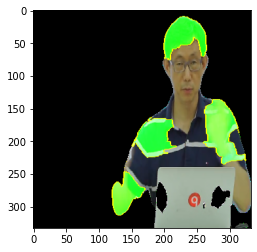

In [143]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation91'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

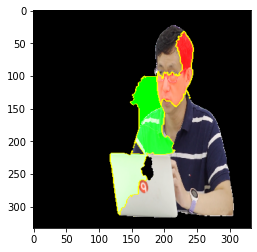

In [148]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation9'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

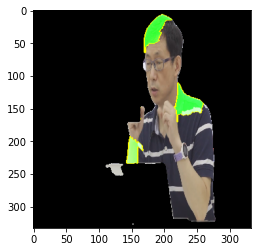

In [150]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation113'].get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

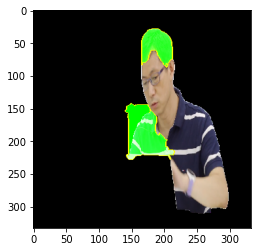

In [151]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation14'].get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

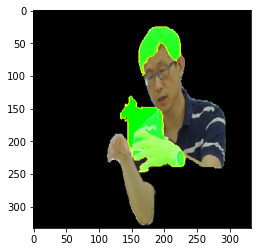

In [154]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation112'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

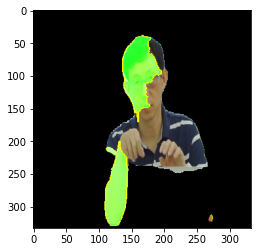

In [157]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation38'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

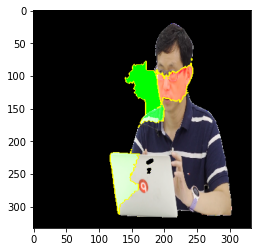

In [159]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation13'].get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

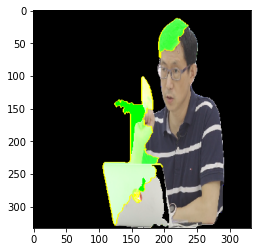

In [165]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation133'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

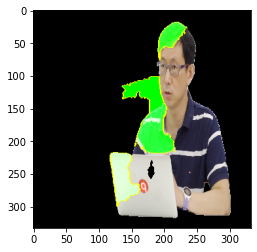

In [166]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation6'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

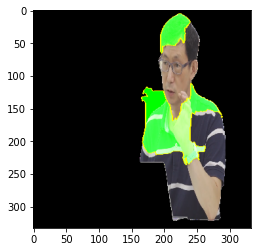

In [170]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation58'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

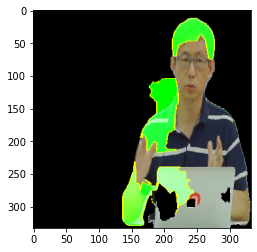

In [172]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation55'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

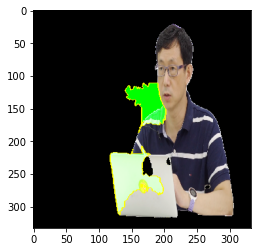

In [174]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation8'].get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

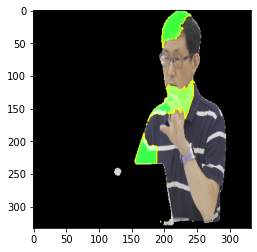

In [176]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation121'].get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

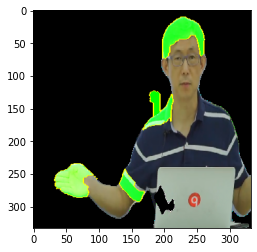

In [222]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation92'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

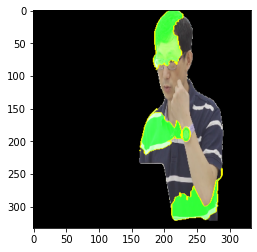

In [178]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation120'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

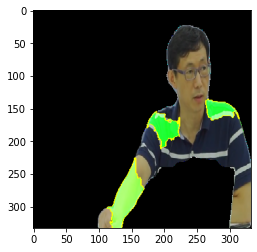

In [215]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation98'].get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

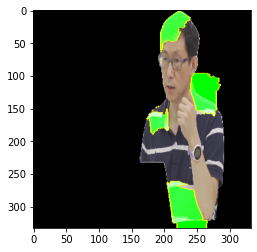

In [181]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation60'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

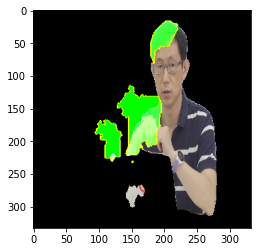

In [184]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation32'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

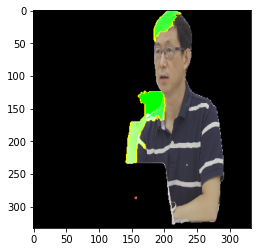

In [185]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation105'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

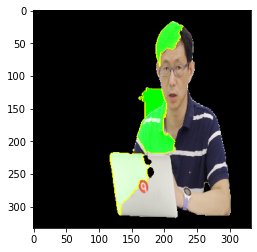

In [186]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation7'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

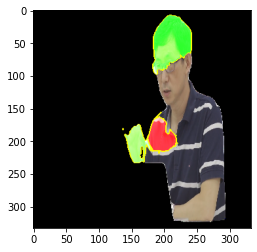

In [109]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation106'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

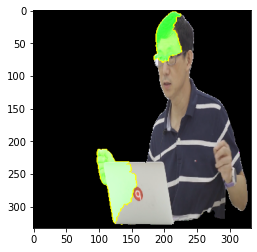

In [190]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation100'].get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

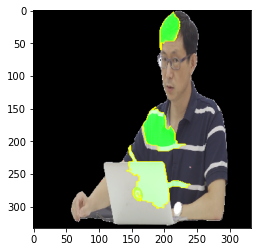

In [192]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation95'].get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

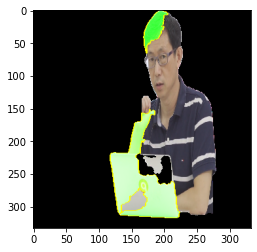

In [193]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation49'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

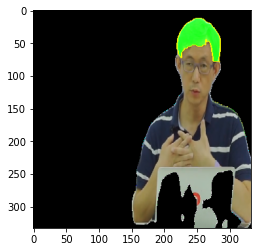

In [197]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation74'].get_image_and_mask(0, positive_only=False, num_features=1, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

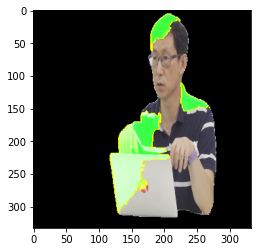

In [114]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation42'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

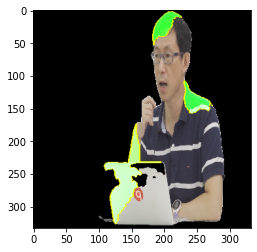

In [115]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation82'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

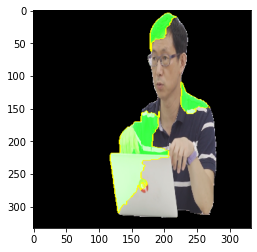

In [116]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation41'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

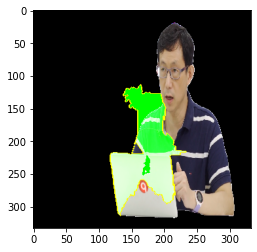

In [117]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation18'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

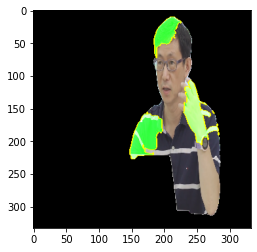

In [199]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation30'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

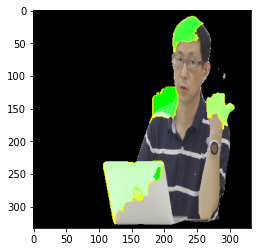

In [200]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation104'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

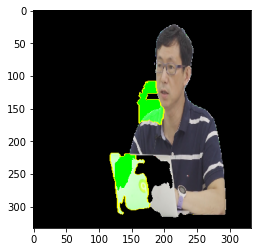

In [204]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation27'].get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

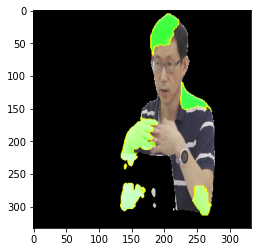

In [205]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation47'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

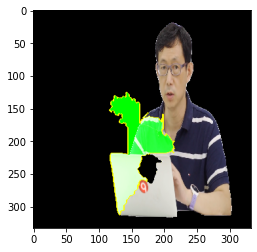

In [207]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation11'].get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

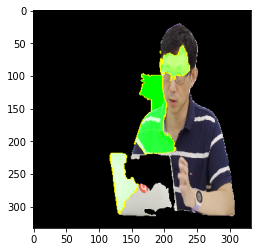

In [123]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation19'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

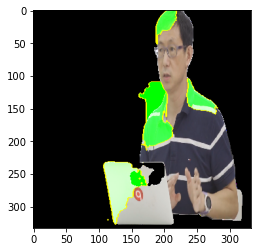

In [124]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation73'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

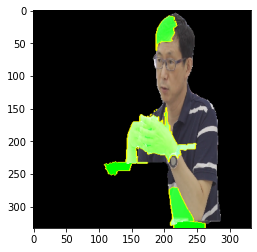

In [125]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation108'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

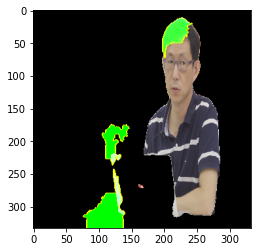

In [208]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation25'].get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

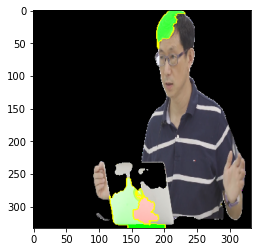

In [209]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation63'].get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

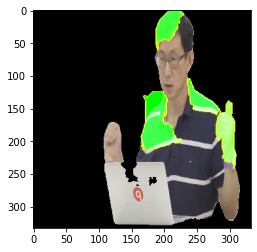

In [128]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation57'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

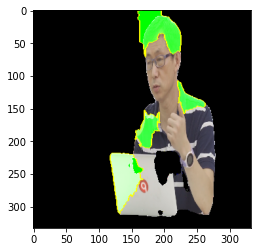

In [129]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation43'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

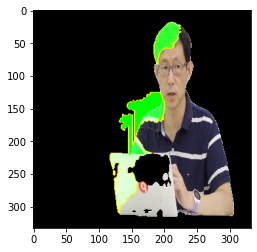

In [130]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation15'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

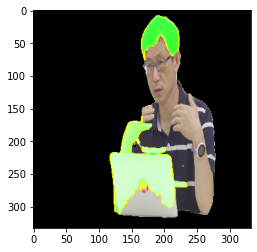

In [131]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation46'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

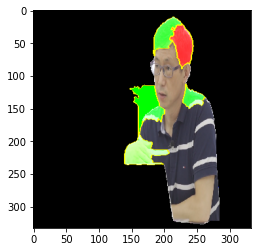

In [132]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation118'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

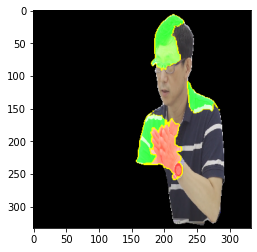

In [226]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation116'].get_image_and_mask(0, positive_only=False, num_features=6, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

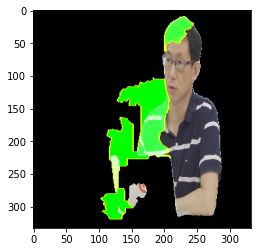

In [134]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation35'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

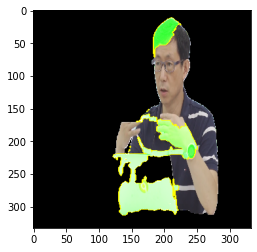

In [225]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation31'].get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

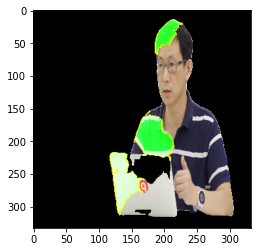

In [213]:
from skimage.segmentation import mark_boundaries
temp, mask = a_dictionary['explanation17'].get_image_and_mask(0, positive_only=False, num_features=4, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))